Importing the libraries

In [9]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf

from glob import glob
from tqdm import tqdm

import matplotlib.pyplot as plt
from PIL import Image

Loading the Images

In [12]:
X = []
Y = []

for i in tqdm(glob('C:/Users/monik/Downloads/train/Open_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(1)
    
for i in tqdm(glob('C:/Users/monik/Downloads/train/Closed_Eyes/*')):
    temp = np.array(Image.open(i).resize((64,64)))
    X.append(temp)
    Y.append(0)    

100%|█████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:04<00:00, 467.51it/s]


Normalizing the images using Min-Max Scaling algorithm

In [14]:
X = (np.array(X) - np.min(X)) / (np.max(X) - np.min(X))
X = X/255.0
Y = (np.array(Y) - np.min(Y)) / (np.max(Y) - np.min(Y))

Expanding the dimensions of array (numpy)

In [16]:
X = np.expand_dims(X,-1)

Spliting the dataset into training and testing data

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

CNN Model

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Conv2D, BatchNormalization, MaxPooling2D, Dropout, Flatten

model = tf.keras.models.Sequential([
      Input(shape=(64, 64, 1)),

      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu'),
      Conv2D(filters = 32, kernel_size = 5, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),

      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu'),
      Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', use_bias=False),
      BatchNormalization(),
      MaxPooling2D(strides = 2),
      Dropout(0.3),
Flatten(),
      Dense(units  = 256, activation = 'relu', use_bias=False),
      BatchNormalization(),

      Dense(units = 128, use_bias=False, activation = 'relu'),

      Dense(units = 84, use_bias=False, activation = 'relu'),
      BatchNormalization(),
      Dropout(0.3),

      Dense(units = 1, activation = 'sigmoid')
  ])

Compiling the Model

In [35]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Training of the Model

In [37]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='C:/Users/monik/Downloads/train/bestModel.keras',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
    verbose =1)
model.fit(x_train, y_train, validation_split=0.2, epochs=20, batch_size=32, callbacks=callback)

Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step - accuracy: 0.9931 - loss: 0.0241
Epoch 1: val_loss improved from inf to 1.74342, saving model to C:/Users/monik/Downloads/train/bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 32s 307ms/step - accuracy: 0.9931 - loss: 0.0241 - val_accuracy: 0.7295 - val_loss: 1.7434
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step - accuracy: 0.9946 - loss: 0.0173
Epoch 2: val_loss did not improve from 1.74342
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 288ms/step - accuracy: 0.9946 - loss: 0.0173 - val_accuracy: 0.4869 - val_loss: 3.0589
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step - accuracy: 0.9983 - loss: 0.0068
Epoch 3: val_loss improved from 1.74342 to 0.73671, saving model to C:/Users/monik/Downloads/train/bestModel.keras
67/67 ━━━━━━━━━━━━━━━━━━━━ 20s 296ms/step - accuracy: 0.9983 - loss: 0.0069 - val_accuracy: 0.7183 - val_loss: 0.7367
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 0s 272ms/step - accuracy: 0.9935 - loss: 0.0161
Epoch 4: val_loss did not imp

Model Evaluation

In [39]:
model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.9990 - loss: 0.0070


[0.01356671191751957, 0.9977272748947144]

Loading the Model Performance

In [41]:
from keras.models import load_model
best_model = load_model('C:/Users/monik/Downloads/train/bestModel.keras')
best_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
best_model.evaluate(x_test, y_test)

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 71ms/step - accuracy: 0.9990 - loss: 0.0047


[0.011856164783239365, 0.9977272748947144]

Changing the dimensions and Plotting the tested images

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


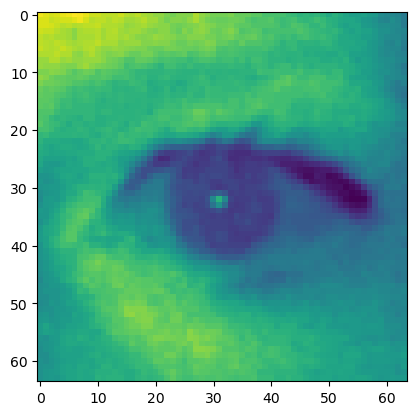

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


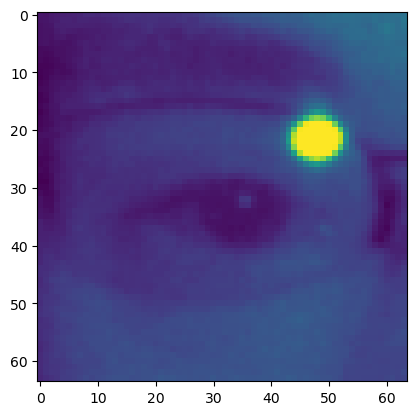

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


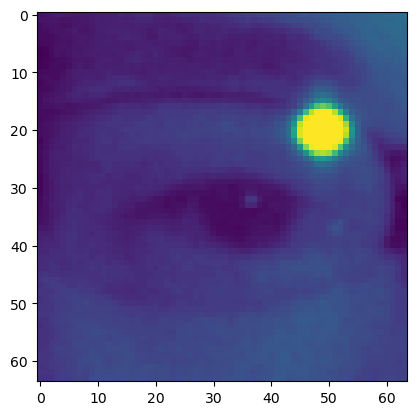

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


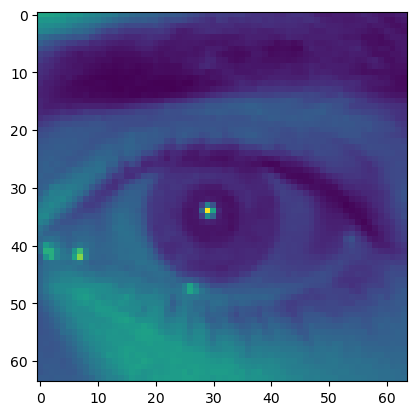

Open
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


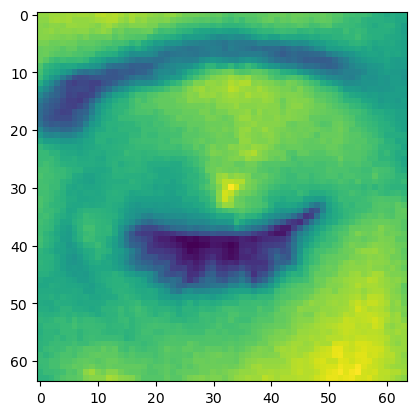

Closed


In [45]:
for i in x_test[6:11]:
    result = best_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()
    
    if result > 0.5:
        print('Open')
    else:
        print("Closed")

Prediction and Confusion Matrix

42/42 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step


Text(0.5, 25.722222222222214, 'Actual')

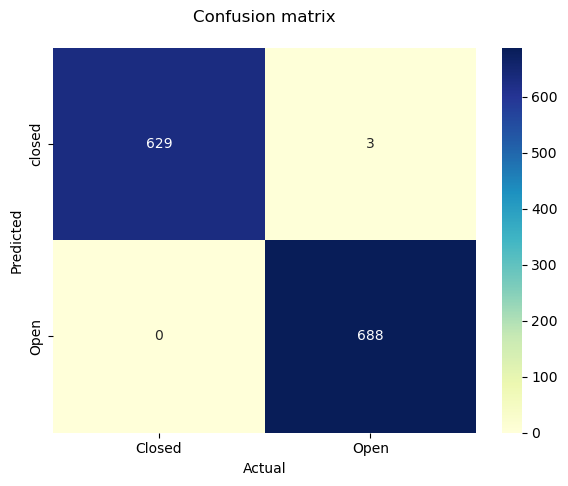

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

plt.figure(figsize=(15, 5))

preds = best_model.predict(x_test)
preds = (preds >= 0.5).astype(np.int32)
cm = confusion_matrix(y_test, preds)
df_cm = pd.DataFrame(cm, index=['closed', 'Open'], columns=['Closed', 'Open'])
plt.subplot(121)
plt.title("Confusion matrix\n")
sns.heatmap(df_cm, annot=True, fmt="d", cmap="YlGnBu")
plt.ylabel("Predicted")
plt.xlabel("Actual")

Evaluating the Accuracy

In [53]:
accuracy = best_model.evaluate(x_test, y_test)[1]
print("Accuracy:", accuracy)

42/42 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - accuracy: 0.9990 - loss: 0.0047
Accuracy: 0.9977272748947144


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
[[0.]]


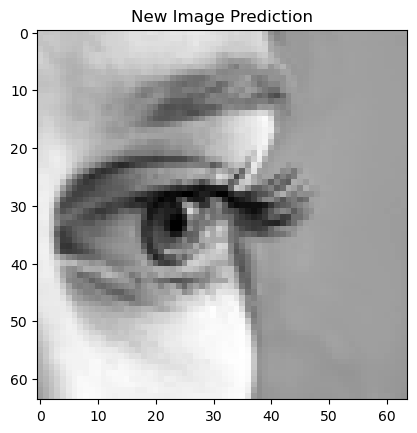

Closed


In [89]:
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the best model
best_model = load_model('C:/Users/monik/Downloads/train/bestModel.keras')

# Function to preprocess the image
def preprocess_image(image_path):
    image = Image.open(image_path).convert('L')  # Convert image to grayscale
    image = image.resize((64, 64))  # Resize to the expected input size
    image = np.array(image)  # Convert to numpy array
    image = image.astype('float32') / 255.0  # Normalize pixel values to [0, 1]
    image = np.expand_dims(image, axis=-1)  # Add channel dimension
    image = np.expand_dims(image, axis=0)  # Add batch dimension
    return image

# Path to the new image
image_path = 'Downloads/pexels-pixabay-63320.jpg'

# Preprocess the new image
new_image = preprocess_image(image_path)

# Make a prediction
result = best_model.predict(new_image)
print(result)
# Display the image
plt.imshow(new_image.squeeze(), cmap='gray')
plt.title("New Image Prediction")
plt.show()

# Interpret the result
if result[0] > 0.5:
    print('Open')
else:
    print('Closed')
